## Data Preprocessing

**Creating Dataframes**

In [ ]:
#Importing Pandas Library
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Loading the CSV files into DataFrames
product_a_df = pd.read_csv('ProductA.csv')
product_a_fb_impressions_df = pd.read_csv('ProductA_fb_impressions.csv')
product_a_google_clicks_df = pd.read_csv('ProductA_google_clicks.csv')

**Merging data with left join.**

In [ ]:
# Merge the DataFrames on 'Day Index'
merged_df = product_a_df.merge(product_a_fb_impressions_df, on='Day Index',how="left")
merged_df = merged_df.merge(product_a_google_clicks_df, on='Day Index',how="left")


**Finding the shape of the dataframe**

In [ ]:
print(merged_df.shape)

(212, 4)


**Getting the info of the dataframe**

In [ ]:
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Day Index    212 non-null    object
 1   Quantity     212 non-null    int64 
 2   Impressions  212 non-null    int64 
 3   Clicks       212 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ KB
None


**Checking for NULL values**

In [ ]:
# checking for missing values
print("Missing values in the merged DataFrame:")
print(merged_df.isnull().sum())

Missing values in the merged DataFrame:
Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


There are no null values present in the dataset

**Checking for duplicates**

In [ ]:
print(merged_df.drop_duplicates())
duplicate= merged_df[merged_df.duplicated()]
print(duplicate)

      Day Index  Quantity  Impressions  Clicks
0    01-12-2021        14          620     445
1    02-12-2021        10          890     433
2    03-12-2021        13          851     424
3    04-12-2021        22          881     427
4    05-12-2021        33          678     451
..          ...       ...          ...     ...
207  26-06-2022        13         1218     114
208  27-06-2022        16         1311     106
209  28-06-2022        13          885     109
210  29-06-2022        16         1000      60
211  30-06-2022         8          875      65

[212 rows x 4 columns]
Empty DataFrame
Columns: [Day Index, Quantity, Impressions, Clicks]
Index: []


There are no duplicates present in the dataframe

**Plotting Outliers**

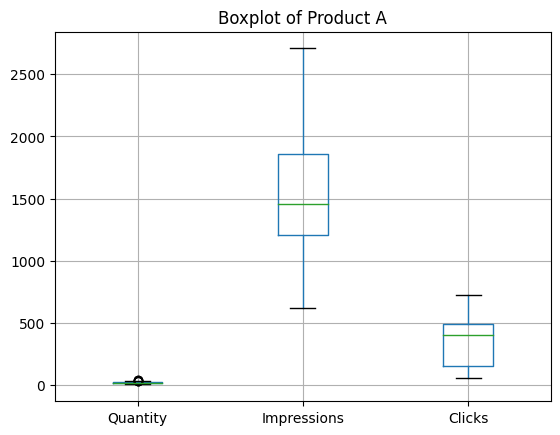

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Boxplot of Product A')
merged_df.boxplot()
plt.show()

There are some outliers present in Quantity Column

**Using Interquartile Range Technique to find the outliers**

In [ ]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity: {len(find_outliers_IQR(merged_df['Quantity']))}")
print(f"Clicks: {len(find_outliers_IQR(merged_df['Clicks']))}")
print(f"Impressions: {len(find_outliers_IQR(merged_df['Impressions']))}")

Outliers in each dependent attribute:
Quantity: 5
Clicks: 0
Impressions: 0


**Finding the Outlier rows in Quantity Column**

In [ ]:
print(f"Quantity:\n{find_outliers_IQR(merged_df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


Any quantity above 32 is considered as an outlier.



**Finding the 95th percentile**

In [ ]:
percentile_95_value = merged_df["Quantity"].quantile(0.95)
print(percentile_95_value)

27.44999999999999


**Finding the 97th percentile**

In [ ]:
percentile_97_value = merged_df["Quantity"].quantile(0.97)
print(percentile_97_value)

30.669999999999987


**Replacing the outliers with 97th percentile**

In [ ]:
def impute_outliers_97th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_97_value = series.quantile(0.97)
    return series.apply(lambda x: percentile_97_value if x < lower_bound or x > upper_bound else x)

**Replacing the outliers with 95th percentile**

In [ ]:
def impute_outliers_95th_percentile(series):
    q1, q3 = series.quantile([0.25, 0.75])
    IQR = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * IQR, q3 + 1.5 * IQR
    percentile_95_value = series.quantile(0.95)
    return series.apply(lambda x: percentile_95_value if x < lower_bound or x > upper_bound else x)

In [ ]:
merged_df['imputed_Quantity_95'] = impute_outliers_95th_percentile(merged_df['Quantity'])

Imputed_Quantity_95 signifies the quantity column where outliers are set on 97th percentile.

In [ ]:
merged_df['imputed_Quantity_97'] = impute_outliers_97th_percentile(merged_df['Quantity'])

Imputed_Quantity_97 signifies the quantity column where outliers are set on 97th percentile.

In [ ]:
merged_df.head()

,Day Index,Quantity,Impressions,Clicks,imputed_Quantity_95,imputed_Quantity_97
0,01-12-2021,14,620,445,14.00,14.00
1,02-12-2021,10,890,433,10.00,10.00
2,03-12-2021,13,851,424,13.00,13.00
3,04-12-2021,22,881,427,22.00,22.00
4,05-12-2021,33,678,451,27.45,30.67


In [ ]:
print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(merged_df['imputed_Quantity_97']))}")
print(f"Quantity:\t {len(find_outliers_IQR(merged_df['imputed_Quantity_95']))}")

Outliers in each dependent attribute:
Quantity:	 0
Quantity:	 0


There are no outliers present in Imputed_Quantity_95 & Imputed_Quantity_97

### Feature Engineering

In [ ]:
merged_df['Day Index'] = pd.to_datetime(merged_df['Day Index'], format='%d-%m-%Y')

# Date-based features
merged_df['Day_of_Week'] = merged_df['Day Index'].dt.dayofweek
merged_df['Month'] = merged_df['Day Index'].dt.month_name()
merged_df['Quarter'] = merged_df['Day Index'].dt.quarter
merged_df['Is_Weekend'] = merged_df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)
merged_df['Day_of_Week'] = merged_df['Day Index'].dt.strftime('%A')

**Lag Features**

In [ ]:
# Lag features
merged_df['Impressions_Lag_1'] = merged_df['Impressions'].shift(1)
merged_df['Clicks_Lag_1'] = merged_df['Clicks'].shift(1)


**Clicks per Impression**

In [ ]:
# Interaction features
merged_df['Clicks_per_Impression'] = merged_df['Clicks'] / merged_df['Impressions']
print(merged_df.head())

   Day Index  Quantity  Impressions  Clicks  imputed_Quantity_95  \
0 2021-12-01        14          620     445                14.00   
1 2021-12-02        10          890     433                10.00   
2 2021-12-03        13          851     424                13.00   
3 2021-12-04        22          881     427                22.00   
4 2021-12-05        33          678     451                27.45   

   imputed_Quantity_97 Day_of_Week     Month  Quarter  Is_Weekend  \
0                14.00   Wednesday  December        4           0   
1                10.00    Thursday  December        4           0   
2                13.00      Friday  December        4           0   
3                22.00    Saturday  December        4           1   
4                30.67      Sunday  December        4           1   

   Impressions_Lag_1  Clicks_Lag_1  Clicks_per_Impression  
0                NaN           NaN               0.717742  
1              620.0         445.0               0.48651

# Data Analysis

**Correlation MAP**

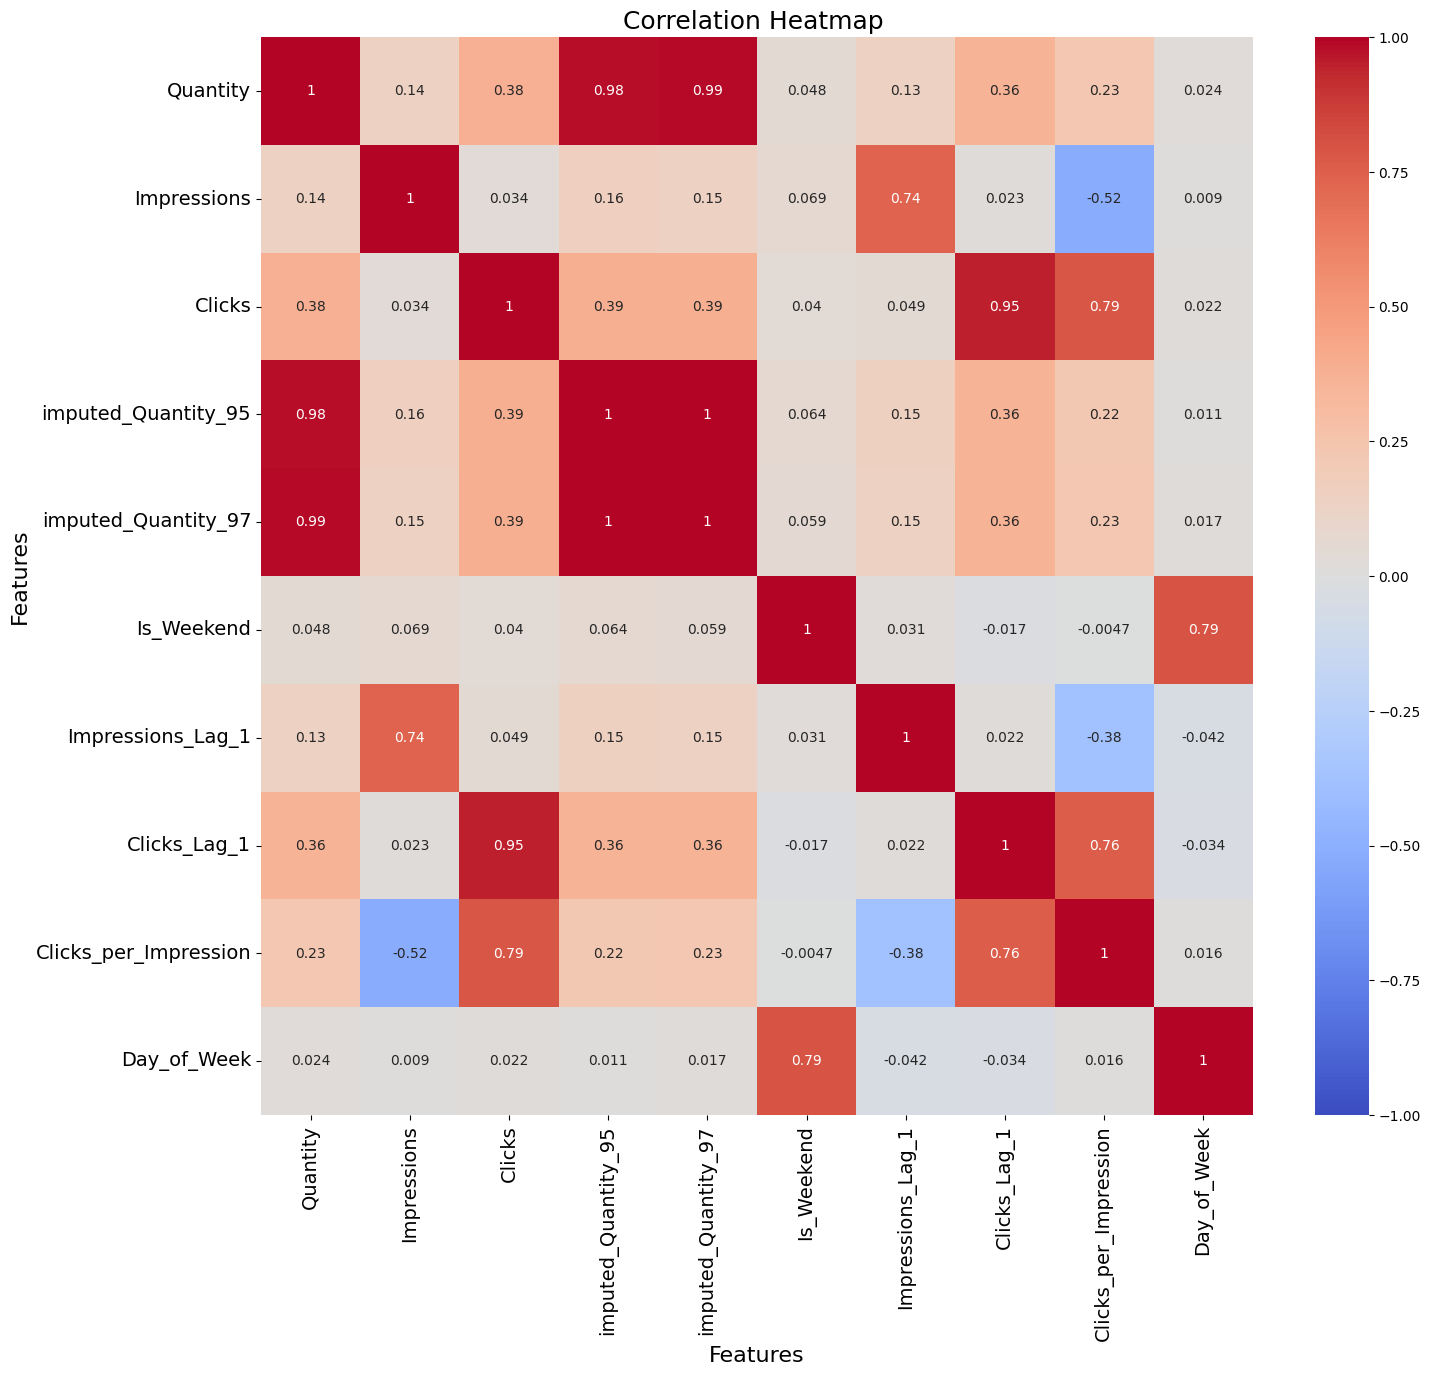

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a temporary DataFrame excluding 'Day Index'
merged_df_no_day_index = merged_df.drop(columns=['Day Index','Month','Day_of_Week','Quarter'])
merged_df_no_day_index['Day_of_Week'] = merged_df['Day Index'].dt.dayofweek
# Calculate correlation matrix
corr_matrix = merged_df_no_day_index.corr()

# Set up the matplotlib figure
plt.figure(figsize=(16, 14))  # Increase the figure size here

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Customize plot labels and title
plt.title('Correlation Heatmap ', fontsize=18)
plt.xlabel('Features', fontsize=16)
plt.ylabel('Features', fontsize=16)

# Adjust tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()


Hypothesis from correlation map

*   Clicks have good correlation with Quantity
*   Impressions also have slight relation to Quantity
*   THe click lag also have an impact on present day clicks






**Relation between clicks and quantity**

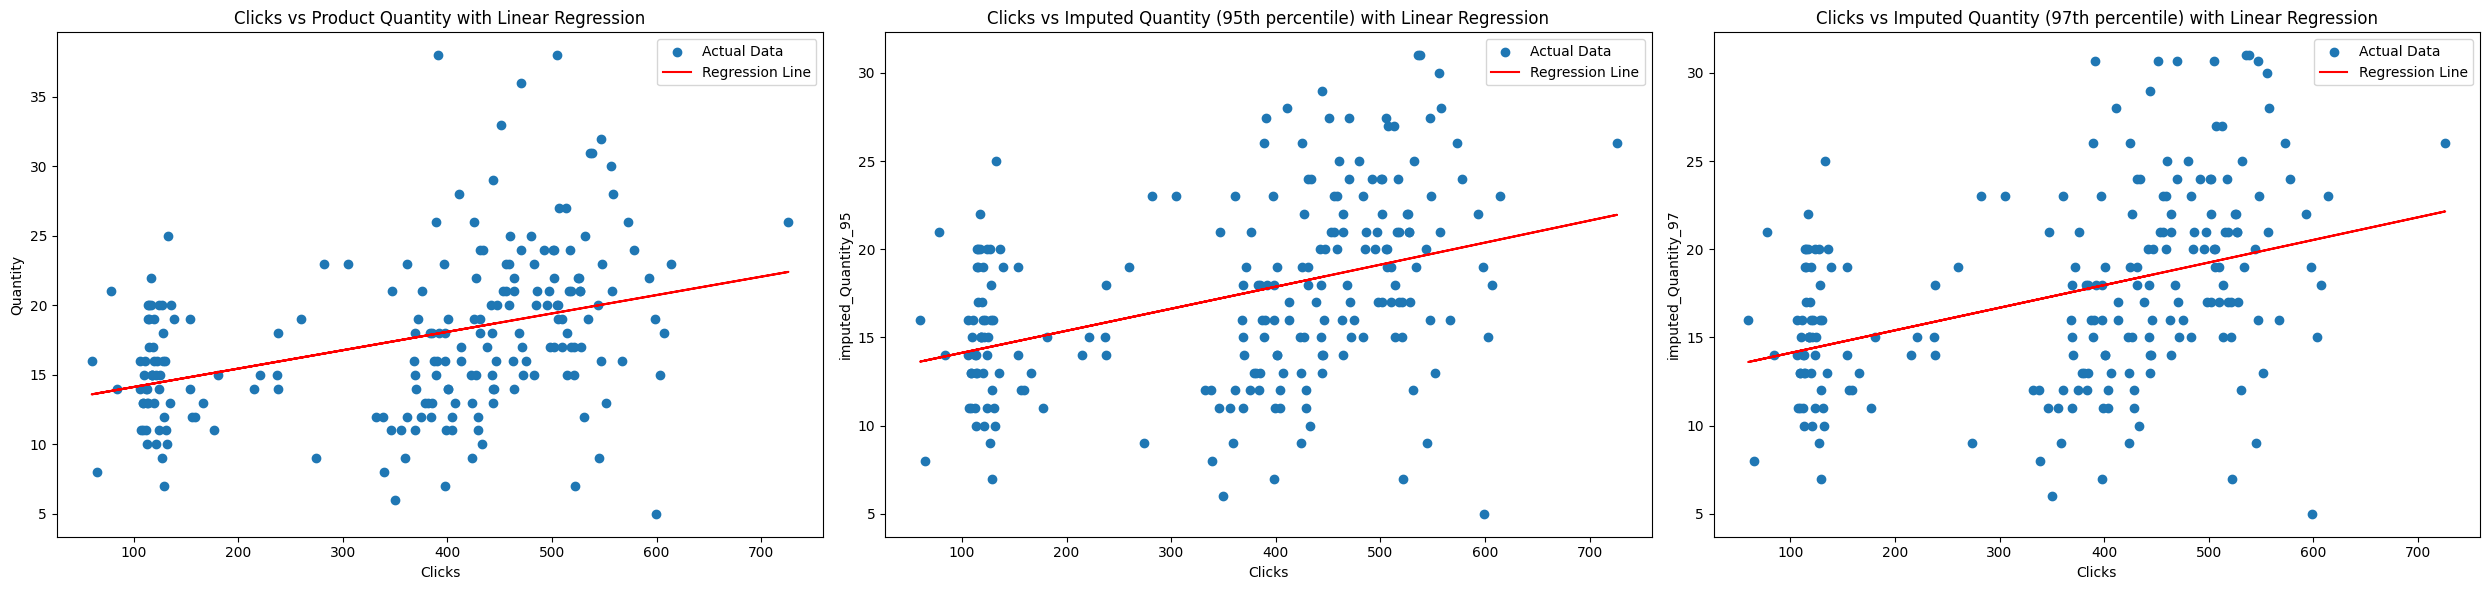

The slope of the linear regression model for original data is: 0.0132349614836548
The slope of the linear regression model for imputed quantity (95th percentile) is: 0.012495252067485784
The slope of the linear regression model for imputed quantity (97th percentile) is: 0.01281830334697891


In [ ]:
from sklearn.linear_model import LinearRegression

# Define function for plotting regression with labels and titles
def plot_regression(df, x_col, y_col, title, ax):
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    slope = model.coef_[0]

    ax.scatter(df[x_col], df[y_col], label='Actual Data')
    ax.plot(df[x_col], y_pred, color='red', label='Regression Line')
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.legend()
    return slope

# Create subplots for plotting
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting regression for different scenarios
slope_original = plot_regression(merged_df, 'Clicks', 'Quantity', 'Clicks vs Product Quantity with Linear Regression', axes[0])
slope_imputed = plot_regression(merged_df, 'Clicks', 'imputed_Quantity_95', 'Clicks vs Imputed Quantity (95th percentile) with Linear Regression', axes[1])
slope_imputed_97 = plot_regression(merged_df, 'Clicks', 'imputed_Quantity_97', 'Clicks vs Imputed Quantity (97th percentile) with Linear Regression', axes[2])

plt.tight_layout()
plt.show()

# Print slopes
print(f"The slope of the linear regression model for original data is: {slope_original}")
print(f"The slope of the linear regression model for imputed quantity (95th percentile) is: {slope_imputed}")
print(f"The slope of the linear regression model for imputed quantity (97th percentile) is: {slope_imputed_97}")


This shows a positive relation between clicks and quantity

**Relation between impression and quantity**

In [ ]:
def plot_regression(df, x_col, y_col, title, ax):
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values

    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    slope = model.coef_[0]

    ax.scatter(df[x_col], df[y_col], label='Actual Data')
    ax.plot(df[x_col], y_pred, color='red', label='Regression Line')
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.legend()

    return slope


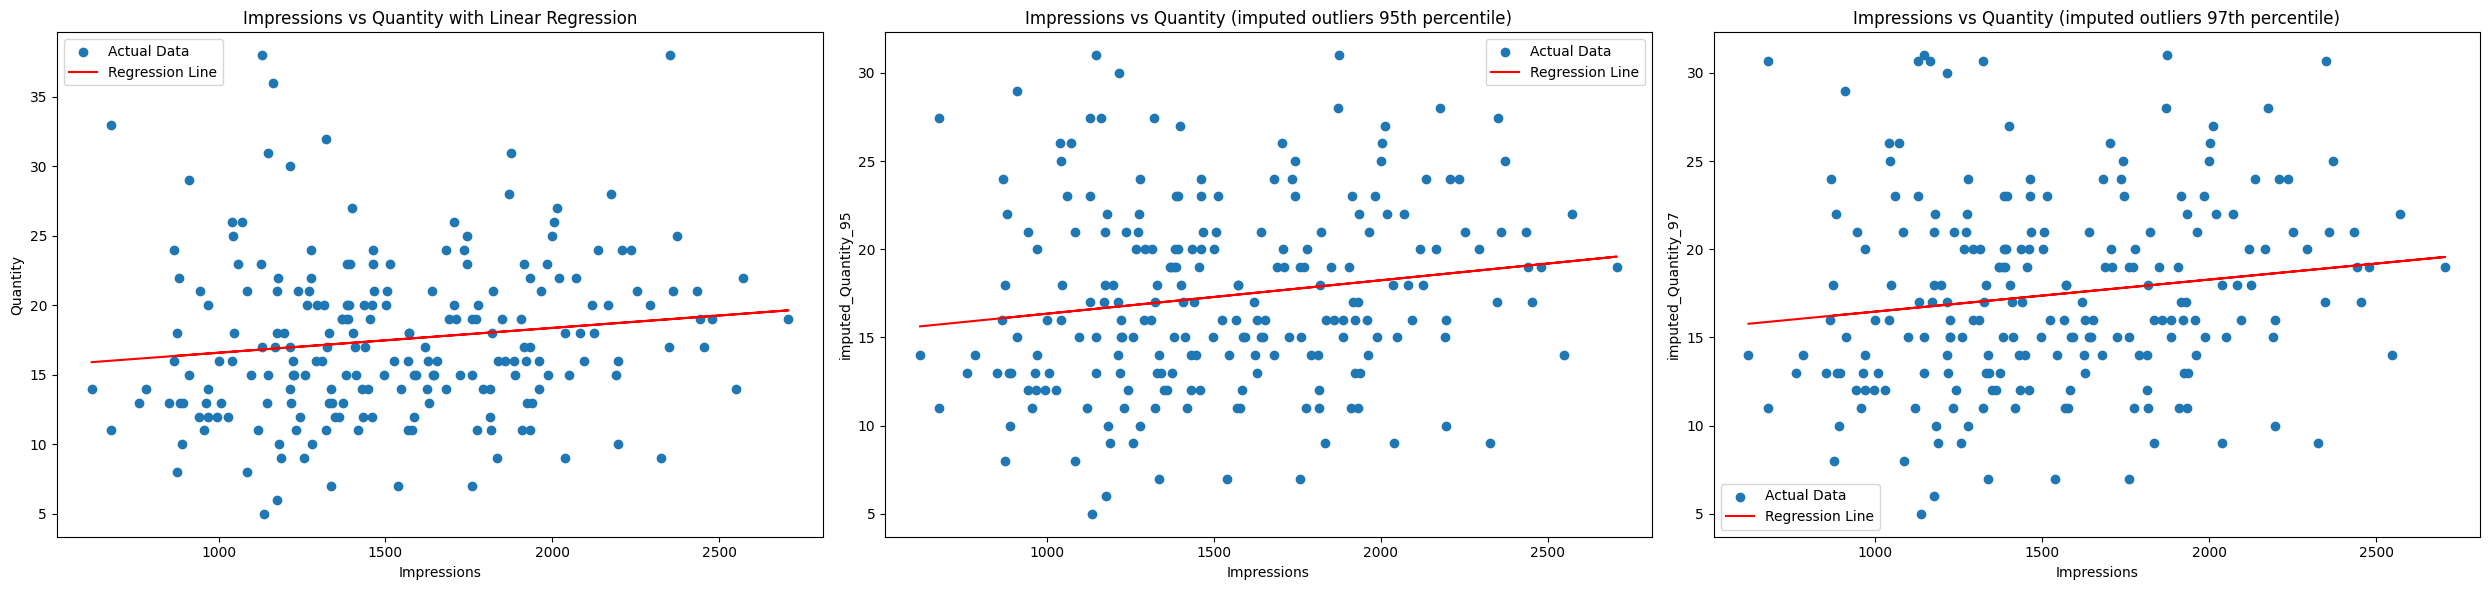

The slope of the linear regression model for original data is: 0.001786329310457124
The slope of the linear regression model for imputed quantity (95th percentile) is: 0.0018950388073789275
The slope of the linear regression model for imputed quantity (97th percentile) is: 0.0018151514524222265


In [ ]:
# Create subplots for plotting
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting regression for different scenarios
slope_original = plot_regression(merged_df, 'Impressions', 'Quantity', 'Impressions vs Quantity with Linear Regression', axes[0])
imputed_slope_95 = plot_regression(merged_df, 'Impressions', 'imputed_Quantity_95', 'Impressions vs Quantity (imputed outliers 95th percentile)', axes[1])
imputed_slope_97 = plot_regression(merged_df, 'Impressions', 'imputed_Quantity_97', 'Impressions vs Quantity (imputed outliers 97th percentile)', axes[2])

plt.tight_layout()
plt.show()

# Print slopes
print(f"The slope of the linear regression model for original data is: {slope_original}")
print(f"The slope of the linear regression model for imputed quantity (95th percentile) is: {imputed_slope_95}")
print(f"The slope of the linear regression model for imputed quantity (97th percentile) is: {imputed_slope_97}")


**Day-wise Quantity for Each Month**

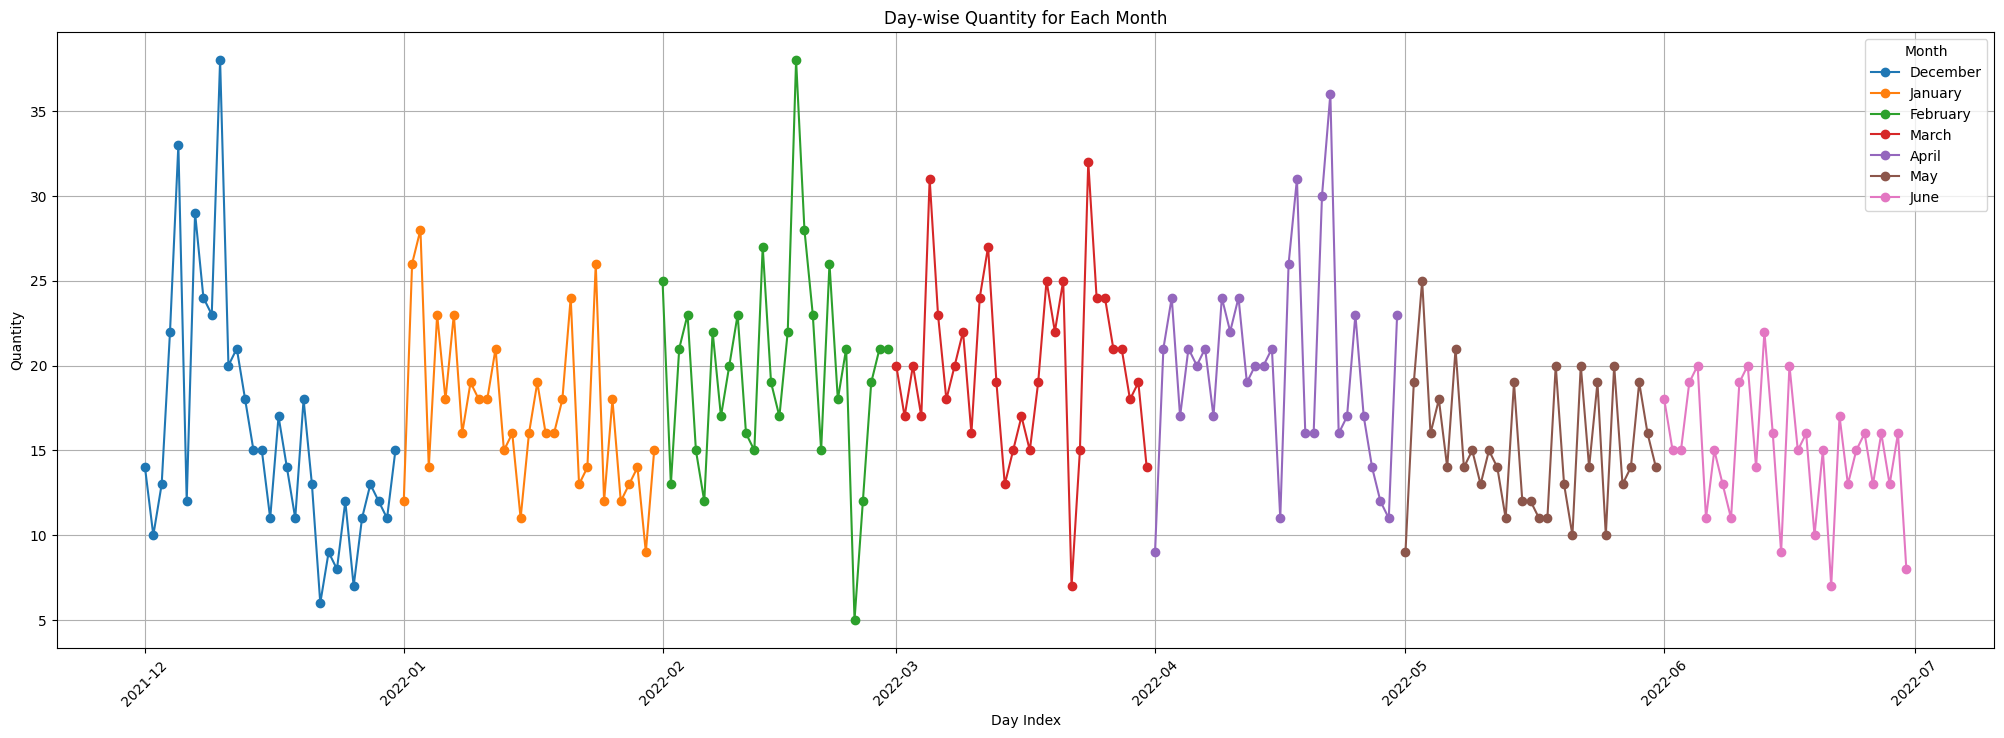

In [ ]:
# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in merged_df['Month'].unique():
    monthly_data = merged_df[merged_df['Month'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Quantity'], marker='o', linestyle='-', label=str(month))

# Add title and labels
plt.title('Day-wise Quantity for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


**Day-wise Clicks for Each Month**

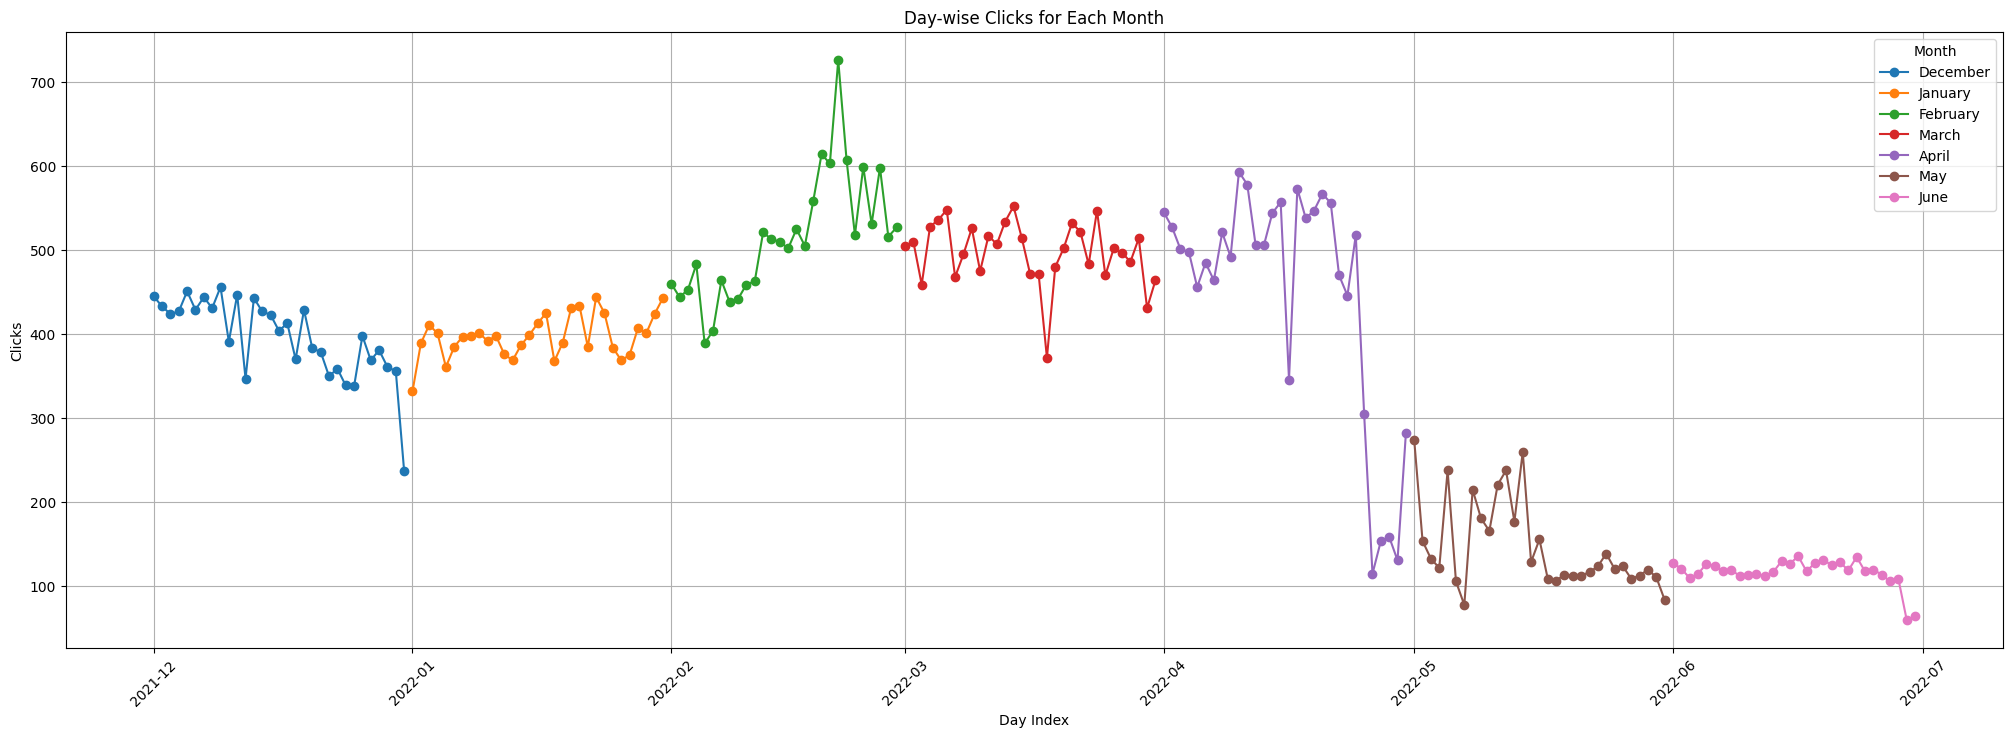

In [ ]:
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in merged_df['Month'].unique():
    monthly_data = merged_df[merged_df['Month'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Clicks'], marker='o', linestyle='-', label=str(month))

# Add title and labels
plt.title('Day-wise Clicks for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


**Day-wise Impressions for Each Month**

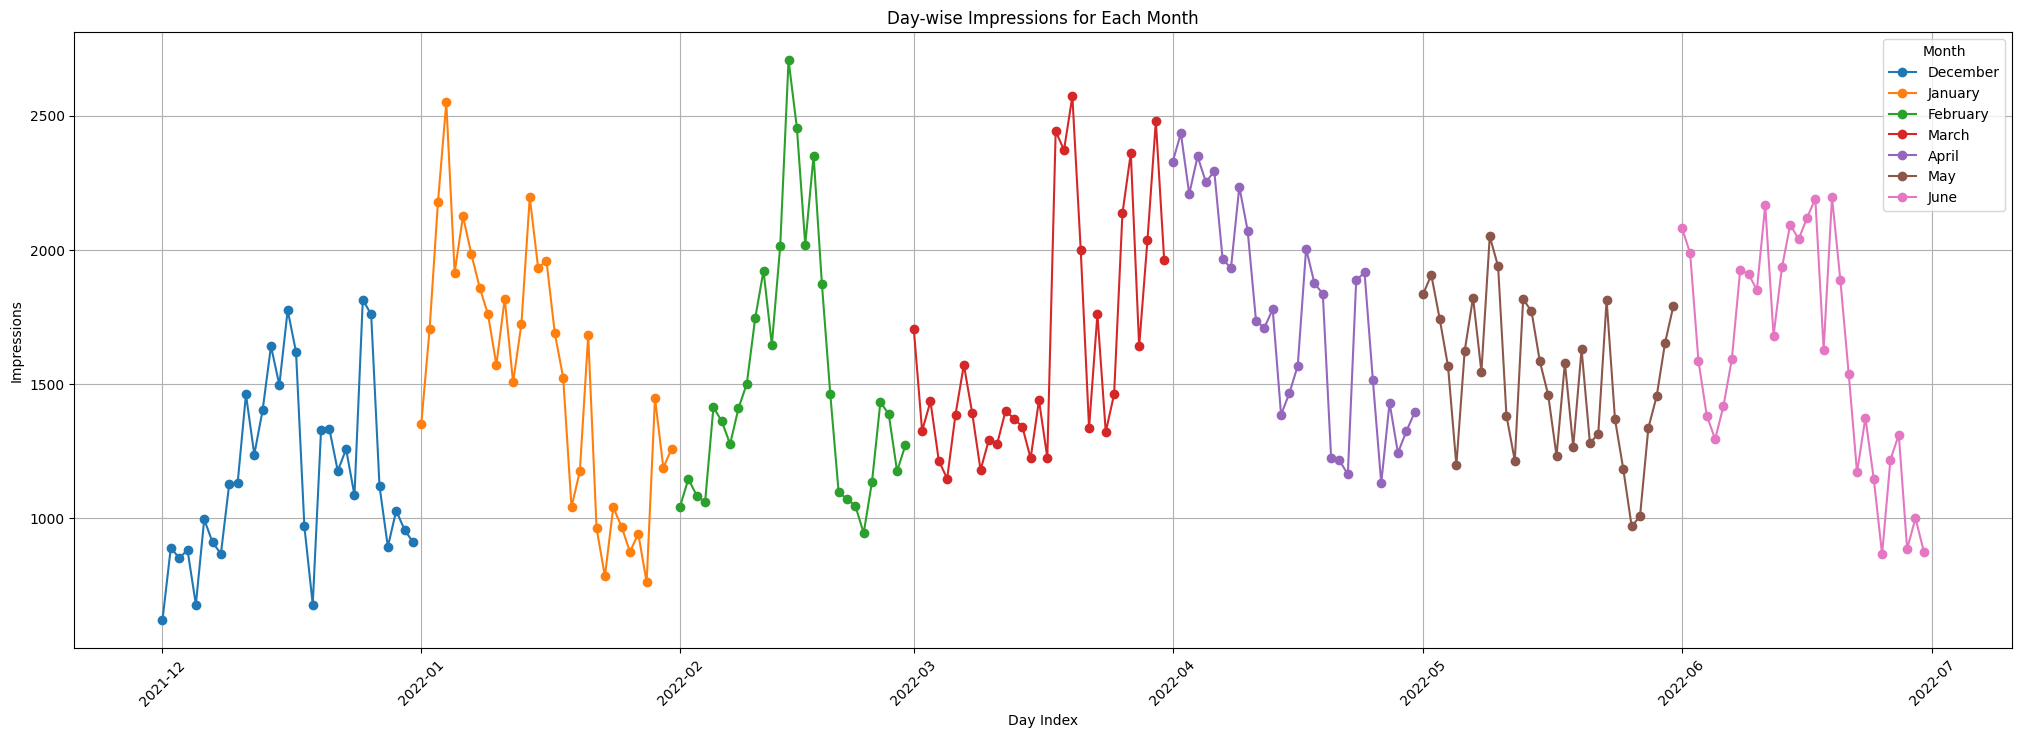

In [ ]:
# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in merged_df['Month'].unique():
    monthly_data = merged_df[merged_df['Month'] == month]
    plt.plot(monthly_data['Day Index'], monthly_data['Impressions'], marker='o', linestyle='-', label=str(month))

# Add title and labels
plt.title('Day-wise Impressions for Each Month')
plt.xlabel('Day Index')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


**Week-wise Quantity for Each Month**

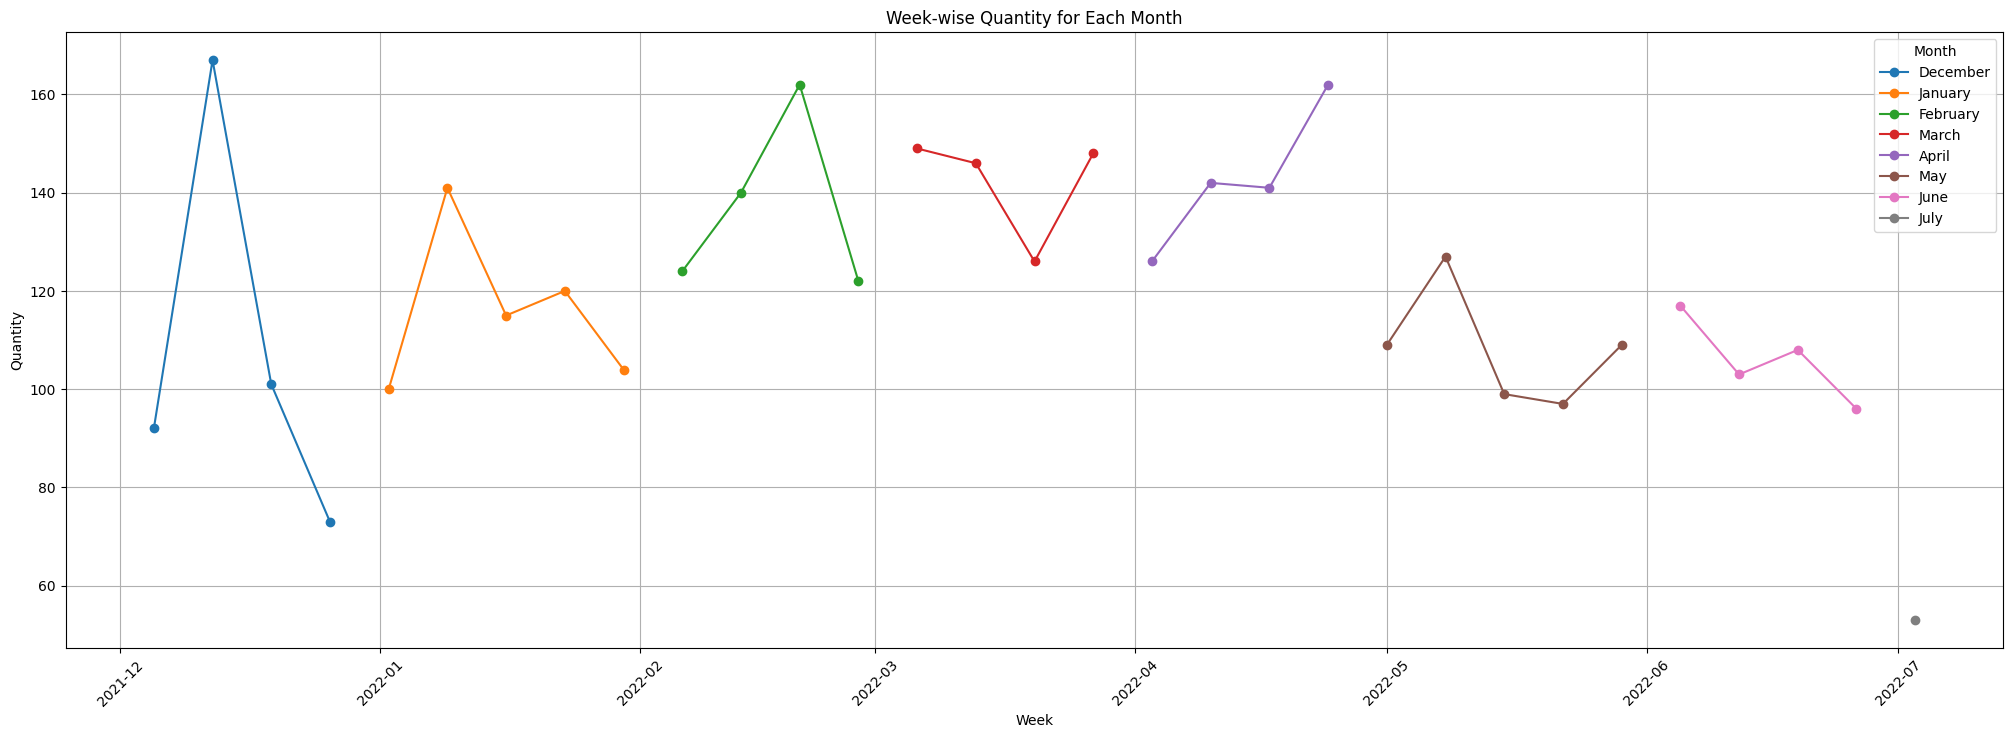

In [ ]:
import matplotlib.pyplot as plt
# Ensure 'Day Index' is datetime and set it as index
merged_df['Day Index'] = pd.to_datetime(merged_df['Day Index'], format='%d-%m-%Y')
merged_df.set_index('Day Index', inplace=True)

# Aggregate data by week
weekly_quantity = merged_df.resample('W').sum()

# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in weekly_quantity.index.month.unique():
    monthly_data = weekly_quantity[weekly_quantity.index.month == month]
    plt.plot(monthly_data.index, monthly_data['Quantity'], marker='o', linestyle='-', label=monthly_data.index.month_name()[0])

# Add title and labels
plt.title('Week-wise Quantity for Each Month')
plt.xlabel('Week')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()



**Week-wise Clicks for Each Month**

Index(['Quantity', 'Impressions', 'Clicks', 'imputed_Quantity_95',
       'imputed_Quantity_97', 'Day_of_Week', 'Month', 'Quarter', 'Is_Weekend',
       'Impressions_Lag_1', 'Clicks_Lag_1', 'Clicks_per_Impression'],
      dtype='object')


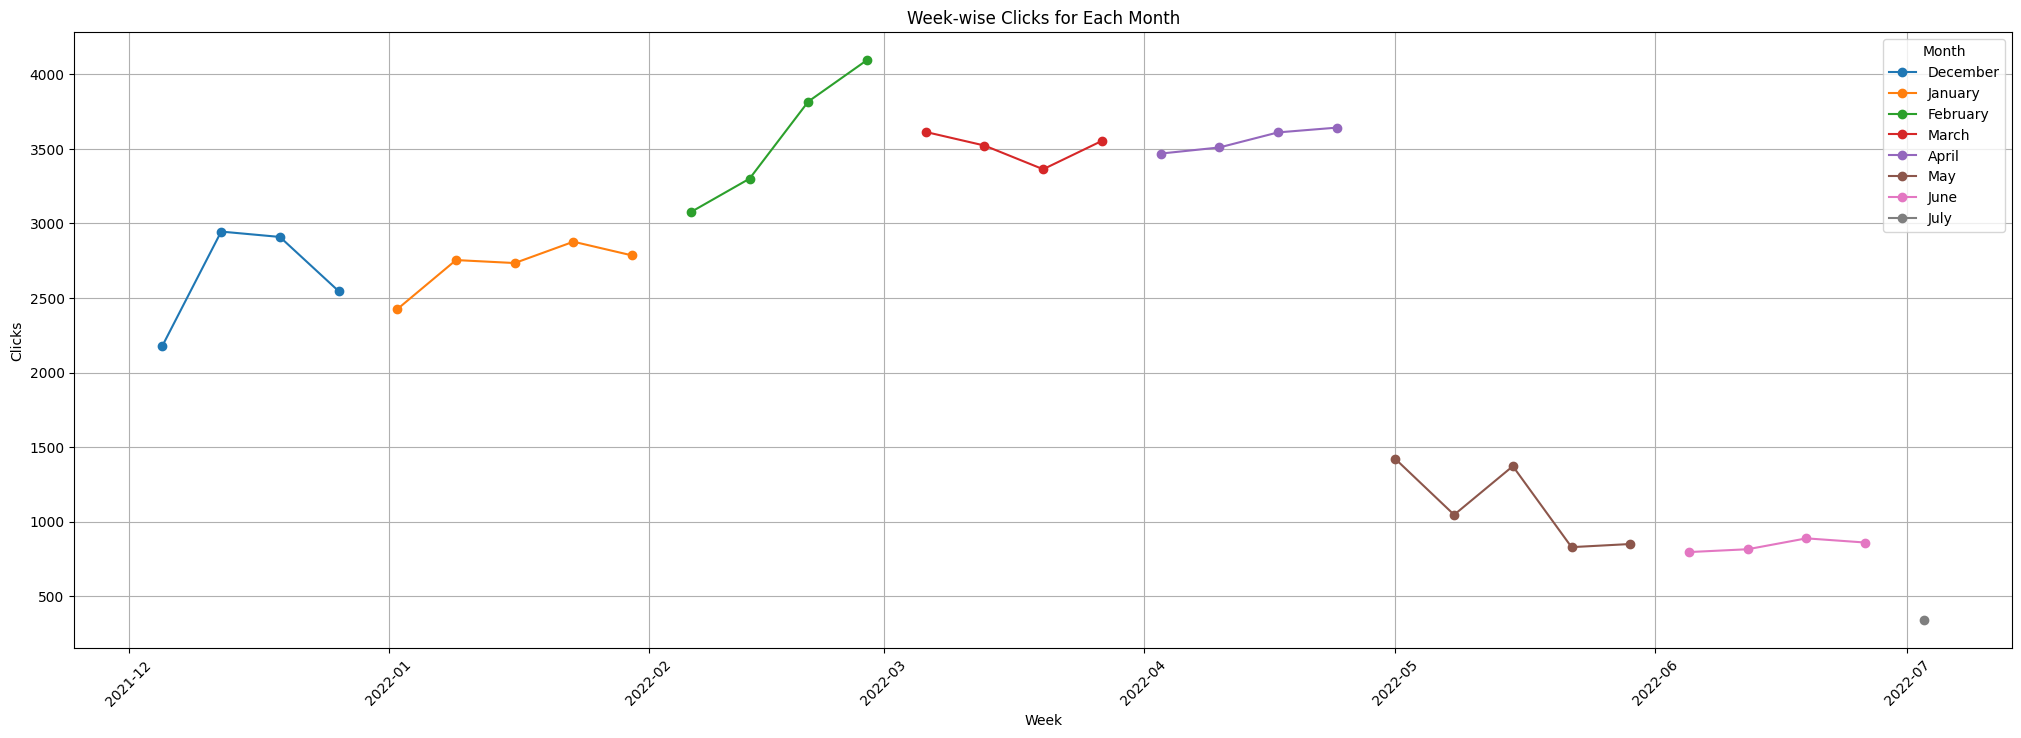

In [ ]:
print(merged_df.columns)
# Aggregate data by week
weekly_clicks = merged_df.resample('W').sum()

# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in weekly_clicks.index.month.unique():
    monthly_data = weekly_clicks[weekly_clicks.index.month == month]
    plt.plot(monthly_data.index, monthly_data['Clicks'], marker='o', linestyle='-', label=monthly_data.index.month_name()[0])

# Add title and labels
plt.title('Week-wise Clicks for Each Month')
plt.xlabel('Week')
plt.ylabel('Clicks')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


**Week-wise Impressions for Each Month**

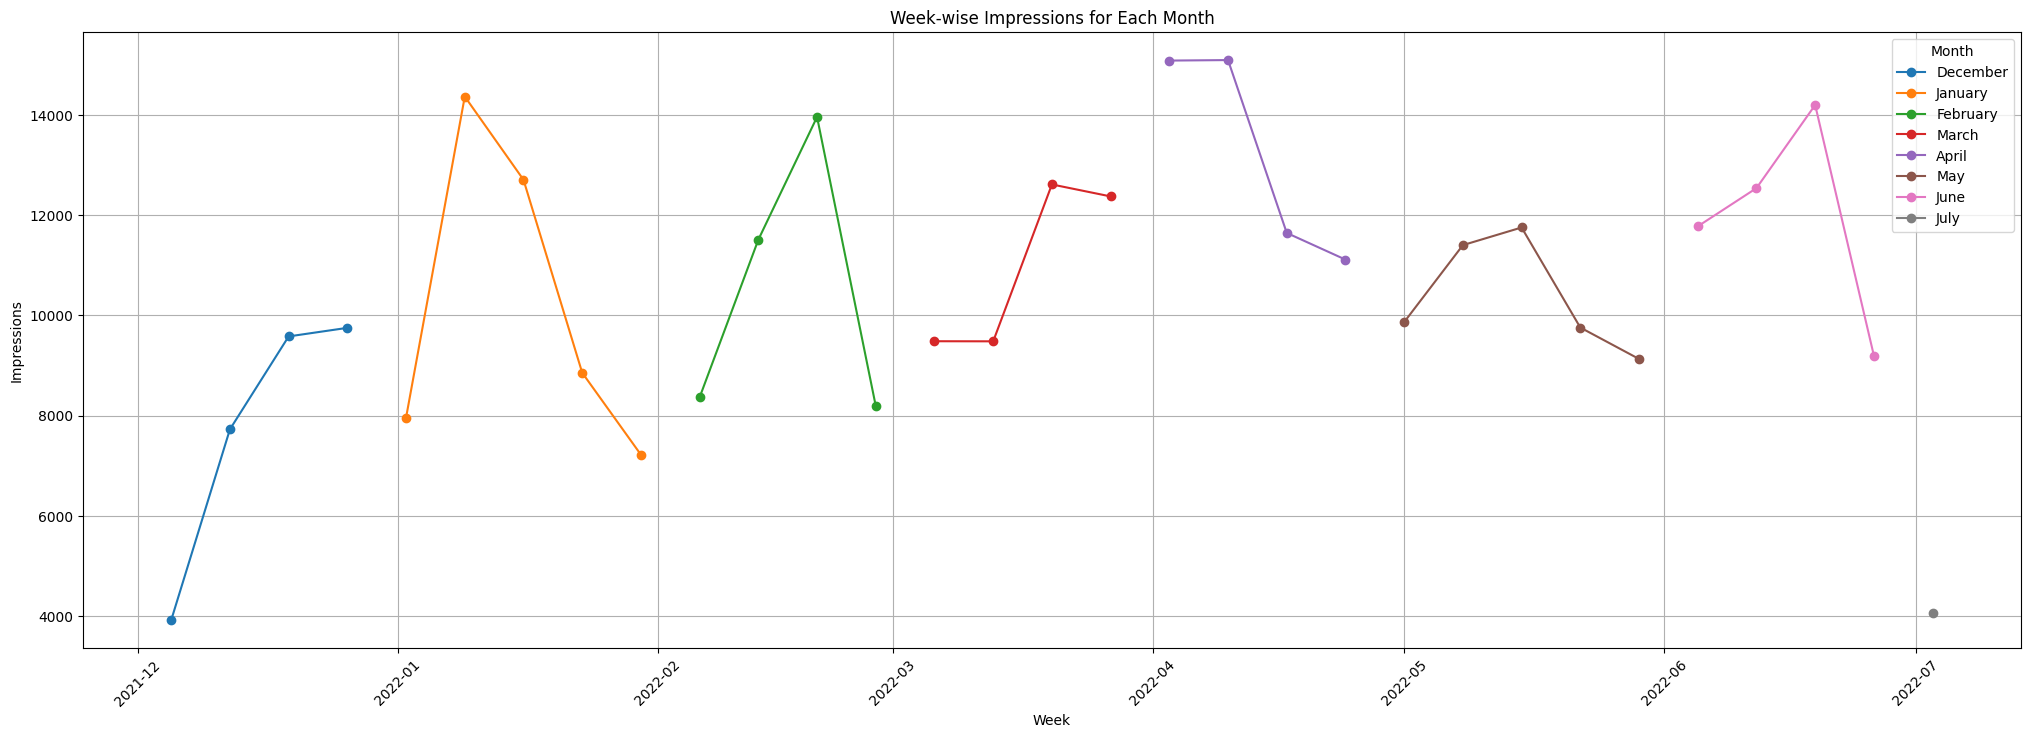

In [ ]:
# Aggregate data by week
weekly_impressions = merged_df.resample('W').sum()

# Create a figure
plt.figure(figsize=(25, 8))

# Iterate over each month and plot the data
for month in weekly_impressions.index.month.unique():
    monthly_data = weekly_impressions[weekly_impressions.index.month == month]
    plt.plot(monthly_data.index, monthly_data['Impressions'], marker='o', linestyle='-', label=monthly_data.index.month_name()[0])

# Add title and labels
plt.title('Week-wise Impressions for Each Month')
plt.xlabel('Week')
plt.ylabel('Impressions')
plt.xticks(rotation=45)
plt.legend(title='Month', loc='best')
plt.grid(True)

# Show the plot
plt.show()


**Distribution of Quantity by Day of the Week**

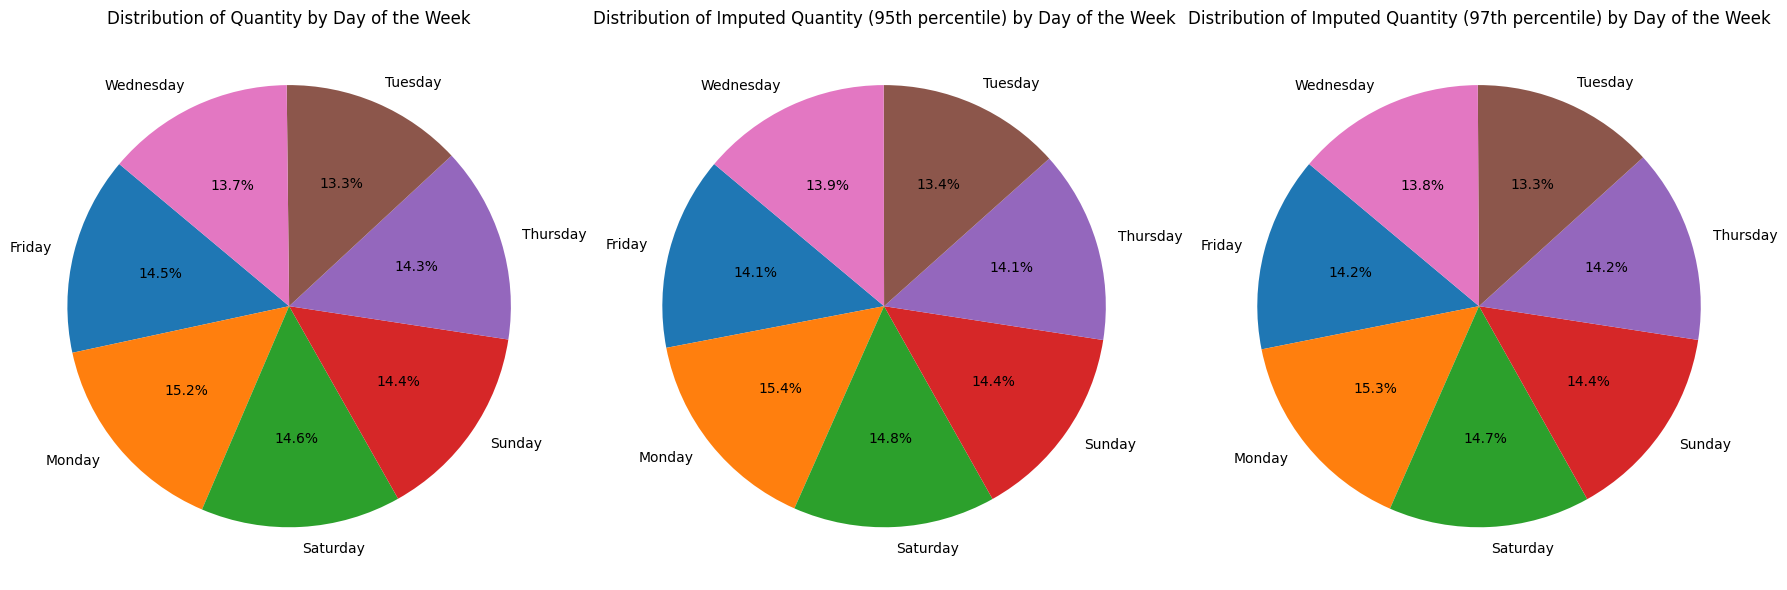

In [ ]:
# Group by Day_of_Week and calculate total Quantity
quantity_by_day = merged_df.groupby('Day_of_Week')['Quantity'].sum()

# Group by Day_of_Week and calculate total Imputed Quantity (assuming imputed_Quantity_95 or imputed_Quantity_97 is available)
imputed_quantity_by_day_95 = merged_df.groupby('Day_of_Week')['imputed_Quantity_95'].sum()
imputed_quantity_by_day_97 = merged_df.groupby('Day_of_Week')['imputed_Quantity_97'].sum()

# Create a figure with 1 row and 3 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plotting Quantity
ax1.pie(quantity_by_day, labels=quantity_by_day.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of Quantity by Day of the Week')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting Imputed Quantity (95th percentile)
ax2.pie(imputed_quantity_by_day_95, labels=imputed_quantity_by_day_95.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Imputed Quantity (95th percentile) by Day of the Week')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting Imputed Quantity (97th percentile)
ax3.pie(imputed_quantity_by_day_97, labels=imputed_quantity_by_day_97.index, autopct='%1.1f%%', startangle=140)
ax3.set_title('Distribution of Imputed Quantity (97th percentile) by Day of the Week')
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


*   This figure shows monday accounts to the highest amount of sales
*   Tuesday account to the least quantity of sales
*   There is a rising trend in quantity for sales from thursday





**Distribution of clicks and impression by Day of the Week**

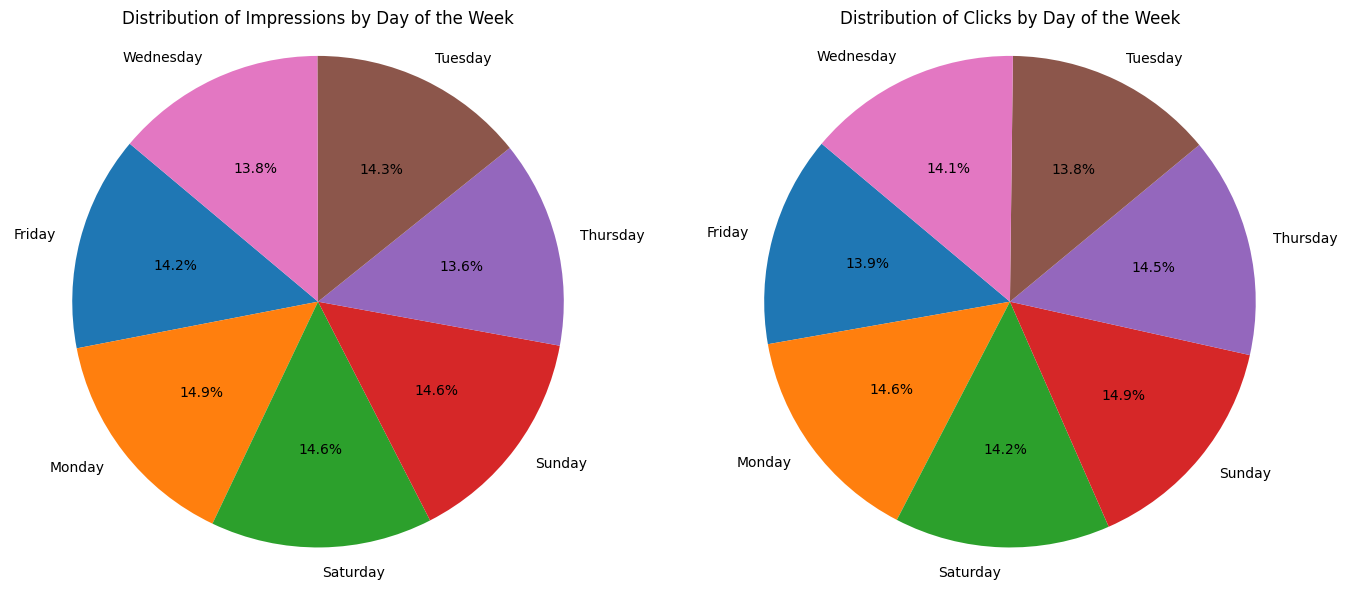

In [ ]:
# Group by Day_of_Week and calculate total Impressions
impressions_by_day = merged_df.groupby('Day_of_Week')['Impressions'].sum()

# Group by Day_of_Week and calculate total Clicks
clicks_by_day = merged_df.groupby('Day_of_Week')['Clicks'].sum()

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Impressions
ax1.pie(impressions_by_day, labels=impressions_by_day.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Distribution of Impressions by Day of the Week')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Plotting Clicks
ax2.pie(clicks_by_day, labels=clicks_by_day.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Distribution of Clicks by Day of the Week')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**Impressions**

*   Monday has the highest no of impressions
*   Trend in increasing from friday

**Clicks**

*   Sunday has highest no of clicks
*   Trend is increasing from Thursday





**WEEKDAYS VS WEEKENDS**

In [ ]:
import pandas as pd

# Assuming merged_df contains your dataset with columns Quantity, Clicks, Impressions, and Is_Weekend

# Count weekdays and weekends
weekday_count = merged_df[merged_df['Is_Weekend'] == 0].shape[0]
weekend_count = merged_df[merged_df['Is_Weekend'] == 1].shape[0]

# Calculate totals for weekdays and weekends
totals_weekdays = merged_df[merged_df['Is_Weekend'] == 0][['Quantity', 'Clicks', 'Impressions']].sum()
totals_weekends = merged_df[merged_df['Is_Weekend'] == 1][['Quantity', 'Clicks', 'Impressions']].sum()

# Display counts and totals
print(f"Number of Weekdays: {weekday_count}")
print(f"Number of Weekends: {weekend_count}")
print("\nTotals for Weekdays:")
print(totals_weekdays)
print("\nTotals for Weekends:")
print(totals_weekends)


Number of Weekdays: 152
Number of Weekends: 60

Totals for Weekdays:
Quantity         2640
Clicks          53822
Impressions    229914
dtype: int64

Totals for Weekends:
Quantity        1079
Clicks         22117
Impressions    94807
dtype: int64


# Time Series Analysis Modelling

##Checking Stationarity of the Data

In [ ]:
merged_df = merged_df.drop('2021-12-01')
from statsmodels.tsa.stattools import adfuller

# Define the ADF test function
def adfuller_test(series, series_name, signif=0.05):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic for {series_name}:', result[0])
    print(f'p-value for {series_name}:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] <= signif:
        print(f" => {series_name} is Stationary. (Reject the null hypothesis)")
    else:
        print(f" => {series_name} is Non-Stationary. (Fail to reject the null hypothesis)")
    print("_" * 70)

# Perform Dickey-Fuller test on the data
for column in ["Quantity", "Clicks", "Impressions"]:
    print(f"ADF Test for {column}:")
    adfuller_test(merged_df[column], column)

ADF Test for Quantity:
ADF Statistic for Quantity: -4.367620230980512
p-value for Quantity: 0.0003385461344077799
Critical Values:
	1%: -3.4623415245233145
	5%: -2.875606128263243
	10%: -2.574267439846904
 => Quantity is Stationary. (Reject the null hypothesis)
______________________________________________________________________
ADF Test for Clicks:
ADF Statistic for Clicks: -0.8688298465462805
p-value for Clicks: 0.7980638515774867
Critical Values:
	1%: -3.4621857592784546
	5%: -2.875537986778846
	10%: -2.574231080806213
 => Clicks is Non-Stationary. (Fail to reject the null hypothesis)
______________________________________________________________________
ADF Test for Impressions:
ADF Statistic for Impressions: -5.609843346852916
p-value for Impressions: 1.2105276807792978e-06
Critical Values:
	1%: -3.461878735881654
	5%: -2.875403665910809
	10%: -2.574159410430839
 => Impressions is Stationary. (Reject the null hypothesis)
__________________________________________________________

Quantity and Impressions are Stationary.But Clicks are Non-Stationary

**Making clicks stationary**

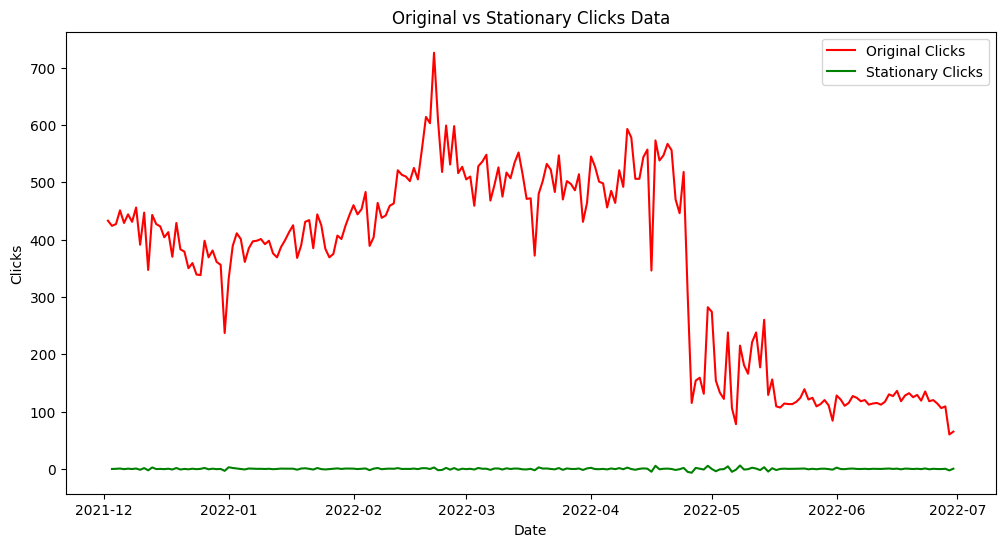

In [ ]:
import numpy as np
# Function to make a series stationary
def make_stationary(series):
    series_log = np.sqrt(series)
    series_diff = series_log.diff().dropna()
    return series_diff

# Apply the function to the "Clicks" series
merged_df['Clicks_stationary'] = make_stationary(merged_df['Clicks'])

# Plotting the original and stationary "Clicks" data
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['Clicks'], label='Original Clicks', color='red')
plt.plot(merged_df.index, merged_df['Clicks_stationary'], label='Stationary Clicks', color='green')
plt.title('Original vs Stationary Clicks Data')
plt.xlabel('Date')
plt.ylabel('Clicks')
plt.legend()
plt.show()

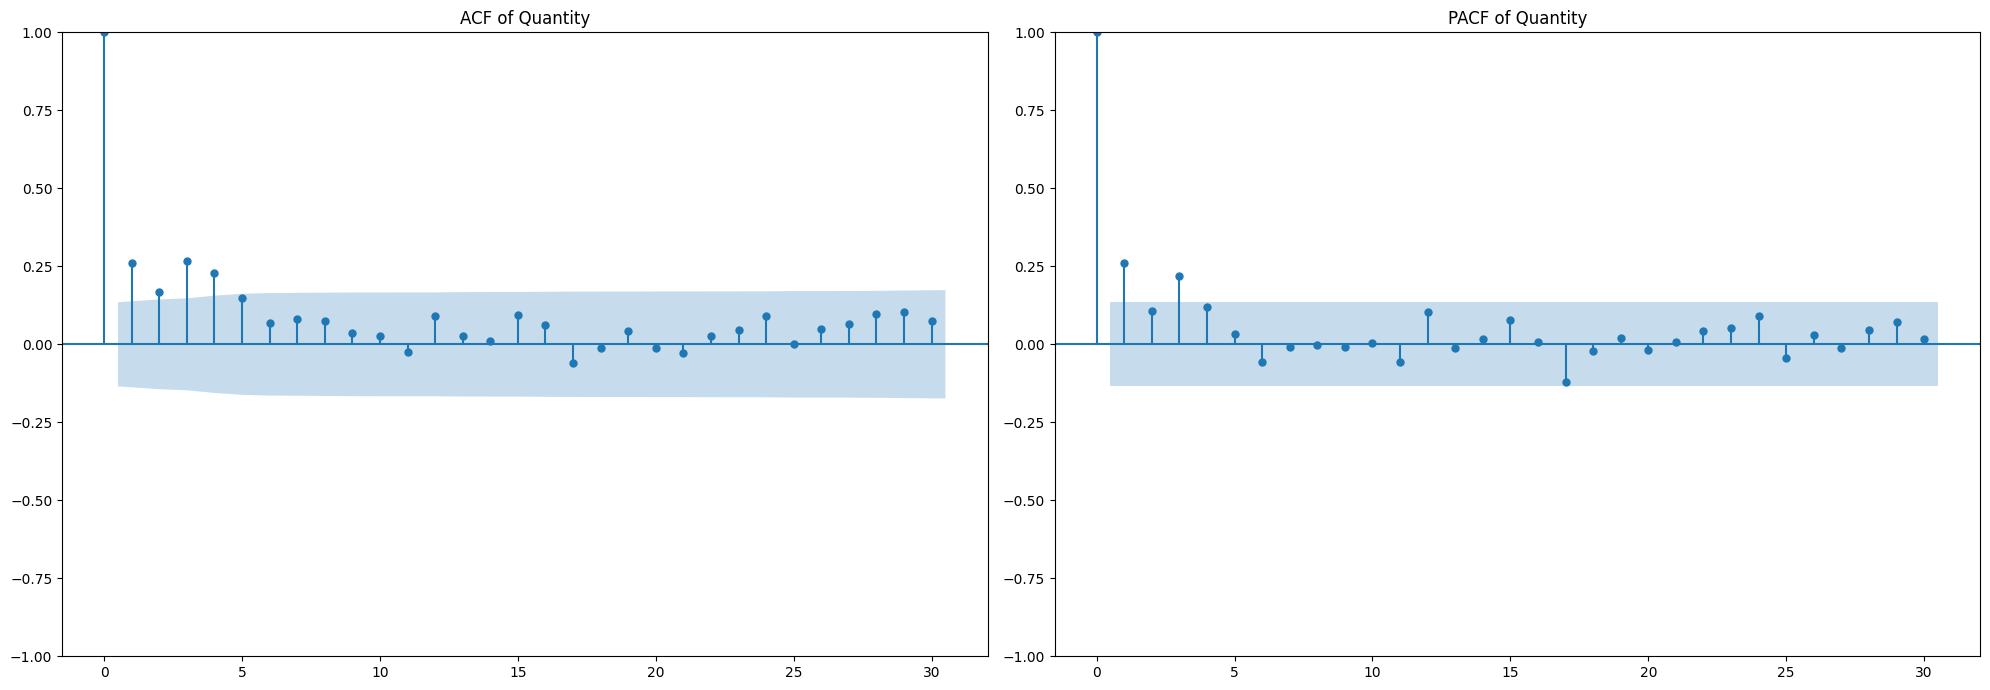

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# ACF plot
plot_acf(merged_df['Quantity'], lags=30, ax=ax1)
ax1.set_title('ACF of Quantity')

# PACF plot
plot_pacf(merged_df['Quantity'], lags=30, ax=ax2)
ax2.set_title('PACF of Quantity')

plt.tight_layout()
plt.show()


From the figure we can determine value of differencing is zero, d = 0 and The value of p = 1 and q = 1 for Quantity.

**Data Split**

In [ ]:
# Calculate the split indices
train_size = int(0.80 * len(merged_df))
val_size = int(0.10 * len(merged_df))
test_size = len(merged_df) - train_size - val_size

# Split the DataFrame
train_df = merged_df.iloc[:train_size]
val_df = merged_df.iloc[train_size:train_size + val_size]
test_df = merged_df.iloc[train_size + val_size:]

# Print the sizes of the splits
print("Train Data Size:\t", len(train_df))
print("Validation Data Size:\t", len(val_df))
print("Test Data Size:\t\t", len(test_df))


Train Data Size:	 168
Validation Data Size:	 21
Test Data Size:		 22


###MODELLING

Creating a function for plotting AR,MA,ARIMA,SARIMA

In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def plot_predictions_and_metrics(train_df, val_df, test_df, model, model_name='Model'):
    # Make predictions
    start_train = 0
    end_train = len(train_df) - 1
    predictions_train = model.predict(start=start_train, end=end_train)

    start_val = len(train_df)
    end_val = start_val + len(val_df) - 1
    predictions_val = model.predict(start=start_val, end=end_val)

    start_test = len(train_df) + len(val_df)
    end_test = start_test + len(test_df) - 1
    predictions_test = model.predict(start=start_test, end=end_test)

    # Plot predictions vs actuals for training, validation, and test sets
    plt.figure(figsize=(15, 7))
    plt.plot(train_df.index, train_df['Quantity'], label='Training Data')
    plt.plot(val_df.index, val_df['Quantity'], label='Validation Data')
    plt.plot(test_df.index, test_df['Quantity'], label='Test Data')
    plt.plot(train_df.index, predictions_train, label='Training Predictions', color='blue', linestyle='--')
    plt.plot(val_df.index, predictions_val, label='Validation Predictions', color='red', linestyle='--')
    plt.plot(test_df.index, predictions_test, label='Test Predictions', color='green', linestyle='--')
    plt.title(f'{model_name} - Training vs Validation vs Test')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

    # Calculate evaluation metrics
    def adjusted_r2_score(r2, n, p):
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    def calculate_metrics(actual, predicted, num_features):
        mse = mean_squared_error(actual, predicted)
        mae = mean_absolute_error(actual, predicted)
        mape = np.mean(np.abs((actual - predicted) / actual)) * 100
        r2 = r2_score(actual, predicted)
        adj_r2 = adjusted_r2_score(r2, len(actual), num_features)
        return mse.round(3), mae.round(3), mape.round(3), r2.round(3), adj_r2.round(3)

    num_features = 1  # For time series, number of predictors is typically 1
    mse_val, mae_val, mape_val, r2_val, adj_r2_val = calculate_metrics(val_df['Quantity'], predictions_val, num_features)
    mse_test, mae_test, mape_test, r2_test, adj_r2_test = calculate_metrics(test_df['Quantity'], predictions_test, num_features)

    # Print evaluation metrics
    print(f'Validation Set Metrics for {model_name}:')
    print(f'MSE: \t\t{mse_val} \nMAE: \t\t{mae_val} \nMAPE: \t\t{mape_val}% \nR2: \t\t{r2_val} \nAdjusted R2: \t{adj_r2_val}')
    print(f'\nTest Set Metrics for {model_name}:')
    print(f'MSE: \t\t{mse_test} \nMAE: \t\t{mae_test} \nMAPE: \t\t{mape_test}% \nR2: \t\t{r2_test} \nAdjusted R2: \t{adj_r2_test}')


Creating a function for plotting ARIMAX,SARIMAX

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_predictions_and_metrics_exog(train_df, val_df, test_df, exog_val, exog_test, model, model_name):
    # Generate predictions for the validation set
    predictions_val = model.get_forecast(steps=len(val_df), exog=exog_val).predicted_mean

    # Generate predictions for the test set
    predictions_test = model.get_forecast(steps=len(test_df), exog=exog_test).predicted_mean

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train_df.index, train_df['Quantity'], label='Train', color='blue')
    plt.plot(val_df.index, val_df['Quantity'], label='Validation', color='orange')
    plt.plot(test_df.index, test_df['Quantity'], label='Test', color='green')
    plt.plot(val_df.index, predictions_val, label='Validation Predictions', color='red')
    plt.plot(test_df.index, predictions_test, label='Test Predictions', color='purple')
    plt.legend()
    plt.title(f'{model_name} Model Predictions')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.show()

    def calculate_mape(actual_values, predicted_values):
        actual_values = np.array(actual_values)
        predicted_values = np.array(predicted_values)
        abs_percentage_error = np.abs((actual_values - predicted_values) / actual_values)
        abs_percentage_error[np.isnan(abs_percentage_error)] = 0
        mape = np.mean(abs_percentage_error) * 100
        return mape

    # Function to calculate adjusted R² score
    def adjusted_r2_score(r2, n, p):
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate metrics
    def calculate_metrics(actual, predicted, num_features):
        mse = mean_squared_error(actual, predicted)
        mae = mean_absolute_error(actual, predicted)
        mape = calculate_mape(actual, predicted)
        r2 = r2_score(actual, predicted)
        adj_r2 = adjusted_r2_score(r2, len(actual), num_features)
        return mse.round(3), mae.round(3), mape.round(3), r2.round(3), adj_r2.round(3)

    num_features = exog_val.shape[1]
    mse_val, mae_val, mape_val, r2_val, adj_r2_val = calculate_metrics(val_df['Quantity'], predictions_val, num_features)
    mse_test, mae_test, mape_test, r2_test, adj_r2_test = calculate_metrics(test_df['Quantity'], predictions_test, num_features)

    # Print metrics
    print(f'{model_name} Validation Set Metrics:')
    print(f'MSE: \t\t{mse_val}')
    print(f'MAE: \t\t{mae_val}')
    print(f'MAPE: \t\t{mape_val}%')
    print(f'R2: \t\t{r2_val}')
    print(f'Adjusted R2: \t{adj_r2_val}')

    print(f'\n{model_name} Test Set Metrics:')
    print(f'MSE: \t\t{mse_test}')
    print(f'MAE: \t\t{mae_test}')
    print(f'MAPE: \t\t{mape_test}%')
    print(f'R2: \t\t{r2_test}')
    print(f'Adjusted R2: \t{adj_r2_test}')




Creating a function for plotting Multivariate Regression

In [ ]:
def plot_predictions_and_metrics_multivariate(train_df, val_df, test_df, features, model, model_name='Model'):
    # Independent variables
    X_val = val_df[features]
    X_test = test_df[features]

    # Make predictions
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)

    # Plot predictions vs actuals for all sets
    plt.figure(figsize=(15, 7))
    plt.plot(train_df.index, train_df['Quantity'], label='Training Actual')
    plt.plot(val_df.index, val_df['Quantity'], label='Validation Actual')
    plt.plot(test_df.index, test_df['Quantity'], label='Test Actual')
    plt.plot(val_df.index, val_pred, label='Validation Predicted', linestyle='--', color='red')
    plt.plot(test_df.index, test_pred, label='Test Predicted', linestyle='--', color='green')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.xlabel('Index')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

    # Function to calculate adjusted R² score
    def adjusted_r2_score(r2, n, p):
        return 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate evaluation metrics
    def calculate_metrics(actual, predicted, X):
        mse = mean_squared_error(actual, predicted)
        mae = mean_absolute_error(actual, predicted)
        mape = np.mean(np.abs((actual - predicted) / actual)) * 100
        r2 = r2_score(actual, predicted)
        adj_r2 = adjusted_r2_score(r2, len(actual), X.shape[1])
        return mse, mae, mape, r2, adj_r2

    val_mse, val_mae, val_mape, val_r2, val_adj_r2 = calculate_metrics(val_df['Quantity'], val_pred, X_val)
    test_mse, test_mae, test_mape, test_r2, test_adj_r2 = calculate_metrics(test_df['Quantity'], test_pred, X_test)

    # Print evaluation metrics
    print(f'\nValidation Set Metrics for {model_name}:')
    print(f'MSE: \t\t{val_mse:.3f} \nMAE: \t\t{val_mae:.3f} \nMAPE: \t\t{val_mape:.3f}% \nR2: \t\t{val_r2:.3f} \nAdjusted R2: \t{val_adj_r2:.3f}')
    print(f'\nTest Set Metrics for {model_name}:')
    print(f'MSE: \t\t{test_mse:.3f} \nMAE: \t\t{test_mae:.3f} \nMAPE: \t\t{test_mape:.3f}% \nR2: \t\t{test_r2:.3f} \nAdjusted R2: \t{test_adj_r2:.3f}')

**AR Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


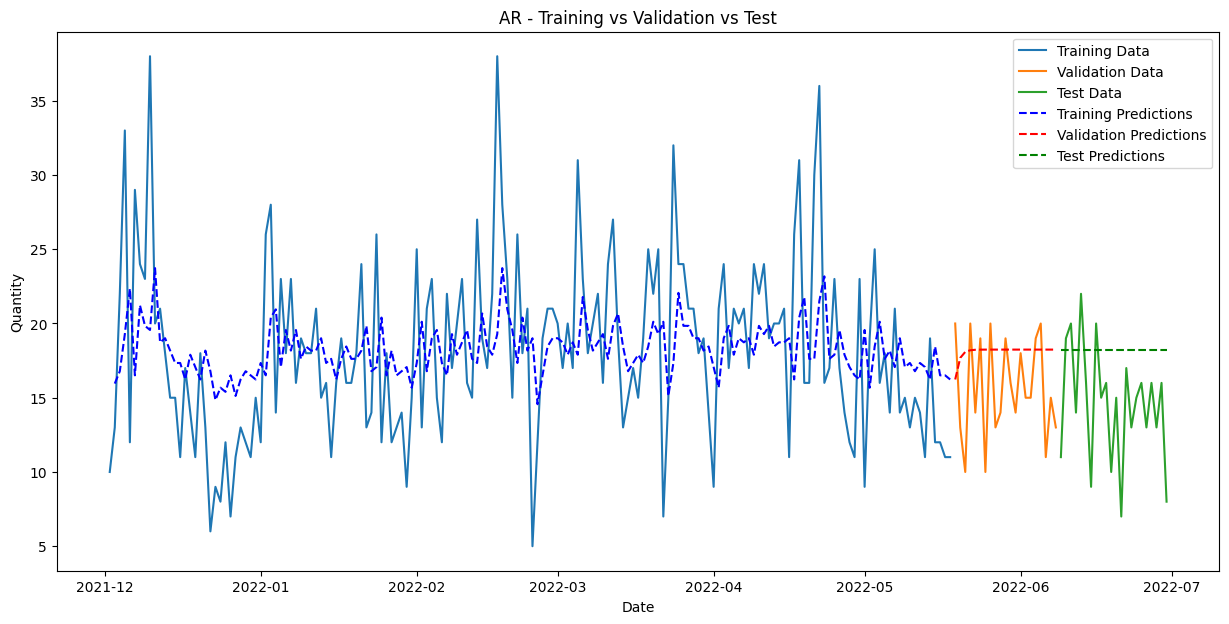

Validation Set Metrics for AR:
MSE: 		18.023 
MAE: 		3.573 
MAPE: 		27.343% 
R2: 		-0.639 
Adjusted R2: 	-0.725

Test Set Metrics for AR:
MSE: 		28.025 
MAE: 		4.381 
MAPE: 		39.622% 
R2: 		-0.907 
Adjusted R2: 	-1.002


In [ ]:
from statsmodels.tsa.api import AutoReg
# fitting the model

AR_model = AutoReg(train_df['Quantity'], lags=1)            # AR(1) Model
AR_result = AR_model.fit()
plot_predictions_and_metrics(train_df, val_df, test_df, AR_result, model_name='AR')

**MA Model**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


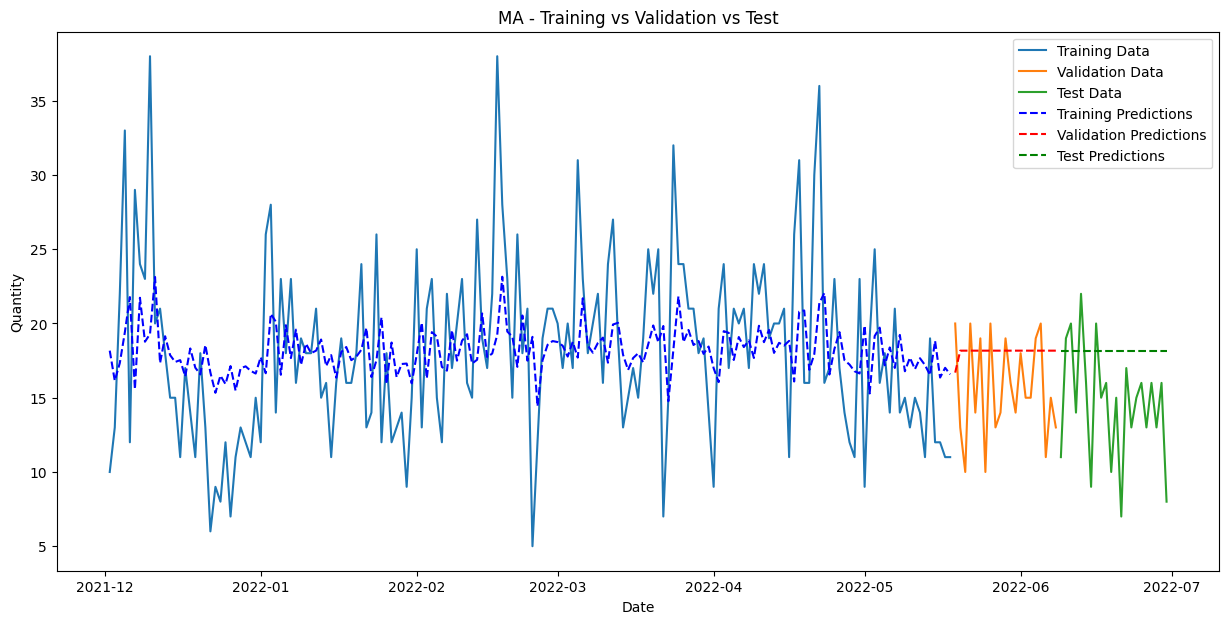

Validation Set Metrics for MA:
MSE: 		17.871 
MAE: 		3.556 
MAPE: 		27.253% 
R2: 		-0.625 
Adjusted R2: 	-0.71

Test Set Metrics for MA:
MSE: 		27.512 
MAE: 		4.336 
MAPE: 		39.22% 
R2: 		-0.872 
Adjusted R2: 	-0.966


In [ ]:
# Define and fit MA model
MA_model = ARIMA(train_df['Quantity'], order=(0, 0, 1))     # MA(1) model
MA_result = MA_model.fit()
plot_predictions_and_metrics(train_df, val_df, test_df, MA_result, model_name='MA')

**ARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


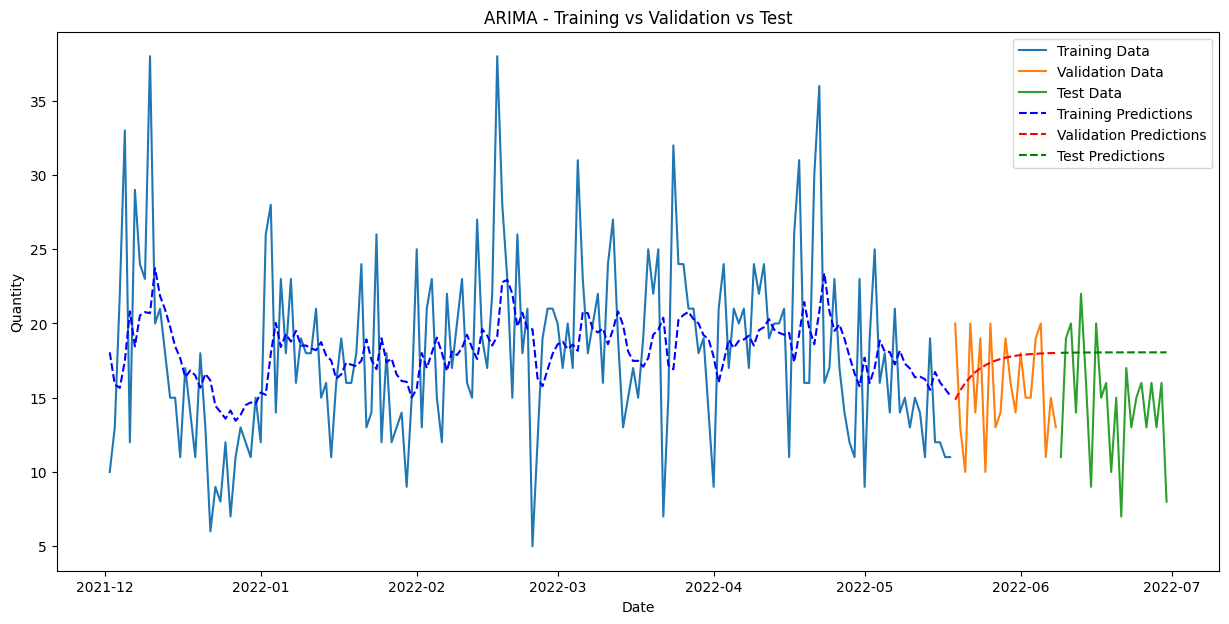

Validation Set Metrics for ARIMA:
MSE: 		14.75 
MAE: 		3.374 
MAPE: 		24.811% 
R2: 		-0.341 
Adjusted R2: 	-0.412

Test Set Metrics for ARIMA:
MSE: 		26.682 
MAE: 		4.263 
MAPE: 		38.561% 
R2: 		-0.816 
Adjusted R2: 	-0.906


In [ ]:
# fitting the model
ARIMA_model = ARIMA(train_df['Quantity'], order=(1, 0, 1))           # ARIMA(1, 0, 1) Model
ARIMA_result = ARIMA_model.fit()
plot_predictions_and_metrics(train_df, val_df, test_df, ARIMA_result, model_name='ARIMA')

**SARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


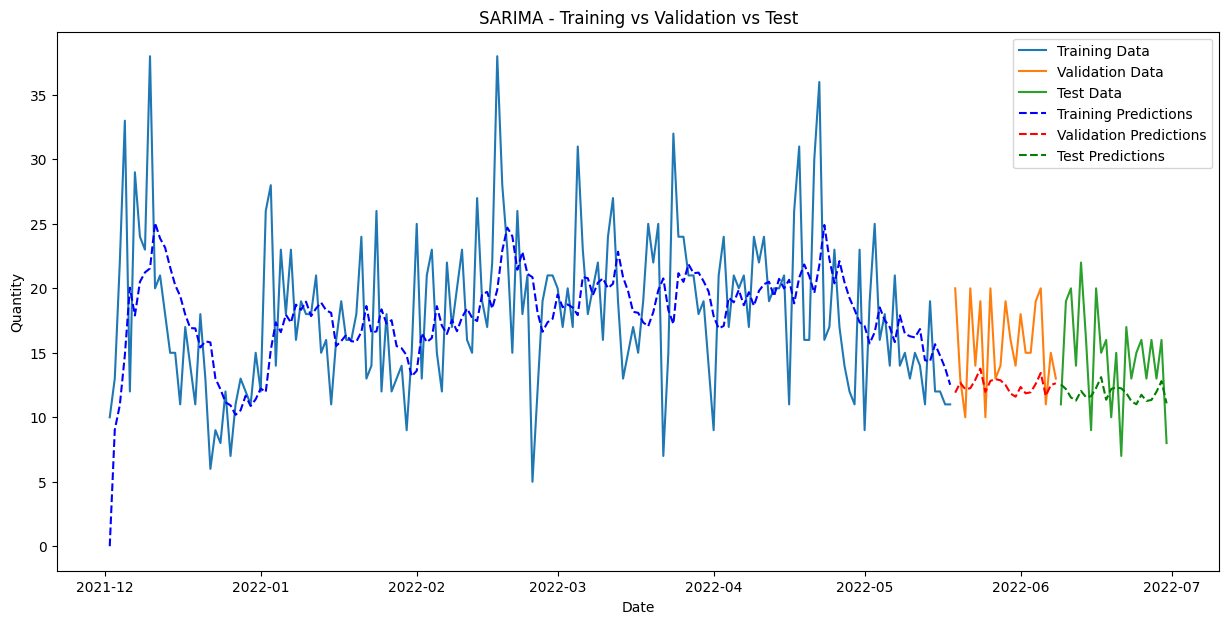

Validation Set Metrics for SARIMA:
MSE: 		20.138 
MAE: 		3.637 
MAPE: 		21.18% 
R2: 		-0.831 
Adjusted R2: 	-0.927

Test Set Metrics for SARIMA:
MSE: 		22.11 
MAE: 		4.078 
MAPE: 		27.915% 
R2: 		-0.504 
Adjusted R2: 	-0.58


In [ ]:
# Define and fit SARIMA model
sarima_model = SARIMAX(train_df['Quantity'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 12))         # 6 gives the least error
sarima_model = sarima_model.fit()
plot_predictions_and_metrics(train_df, val_df, test_df, sarima_model, model_name='SARIMA')

**ARIMAX MODEL**

In [ ]:
# Drop NaN values for modeling
train_df = train_df.dropna(subset=['Clicks_stationary'])
val_df = val_df.dropna(subset=['Clicks_stationary'])
test_df = test_df.dropna(subset=['Clicks_stationary'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


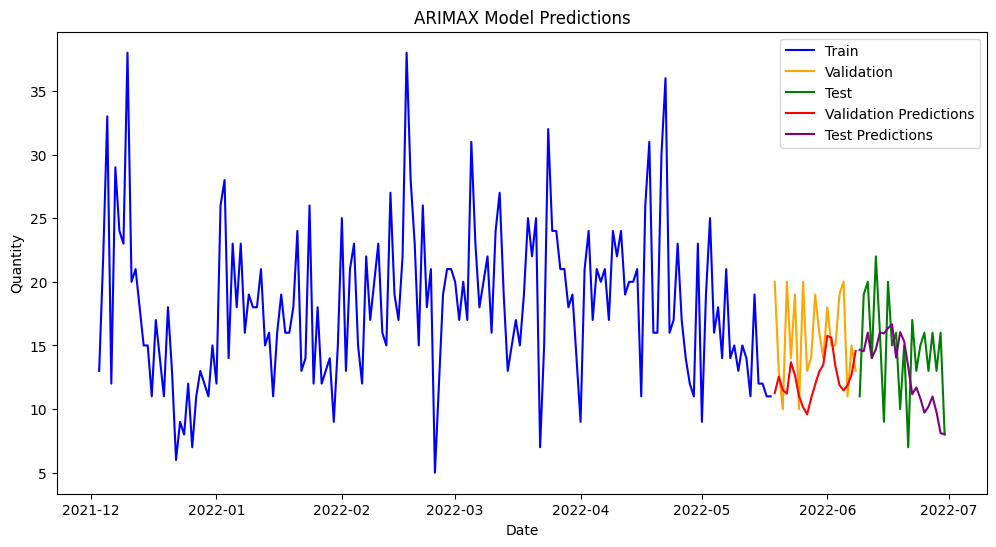

ARIMAX Validation Set Metrics:
MSE: 		24.511
MAE: 		3.763
MAPE: 		21.541%
R2: 		-1.229
Adjusted R2: 	-2.714

ARIMAX Test Set Metrics:
MSE: 		20.248
MAE: 		3.768
MAPE: 		28.203%
R2: 		-0.378
Adjusted R2: 	-1.226


In [ ]:

exog_train = train_df[['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']]
exog_val = val_df[['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']]
exog_test = test_df[['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']]

# Fit the ARIMAX model
arimax_model = SARIMAX(train_df['Quantity'], exog=exog_train, order=(1, 0, 1)).fit()

# Call the function to plot predictions and calculate metrics
plot_predictions_and_metrics_exog(train_df, val_df, test_df, exog_val, exog_test, arimax_model, 'ARIMAX')

**SARIMAX MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


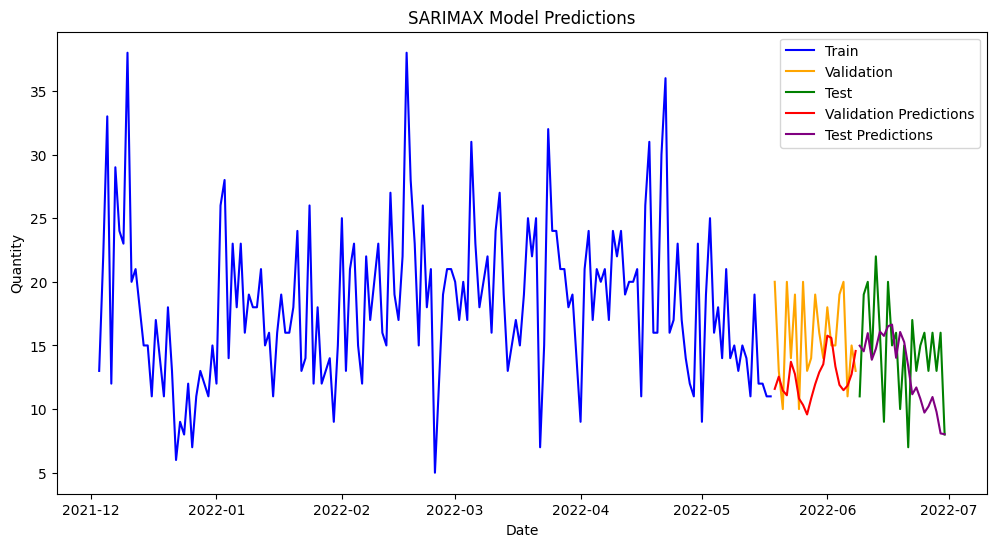

SARIMAX Validation Set Metrics:
MSE: 		24.128
MAE: 		3.727
MAPE: 		21.297%
R2: 		-1.194
Adjusted R2: 	-2.656

SARIMAX Test Set Metrics:
MSE: 		20.243
MAE: 		3.777
MAPE: 		28.29%
R2: 		-0.377
Adjusted R2: 	-1.225


In [ ]:
exog_train = train_df[['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']]
exog_val = val_df[['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']]
exog_test = test_df[['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']]

# Fit the SARIMAX model
sarimax_model = SARIMAX(train_df['Quantity'], exog=exog_train, order=(1, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()

# Call the function to plot predictions and calculate metrics
plot_predictions_and_metrics_exog(train_df, val_df, test_df, exog_val, exog_test, sarimax_model, 'SARIMAX')

**Multivariate Regression**

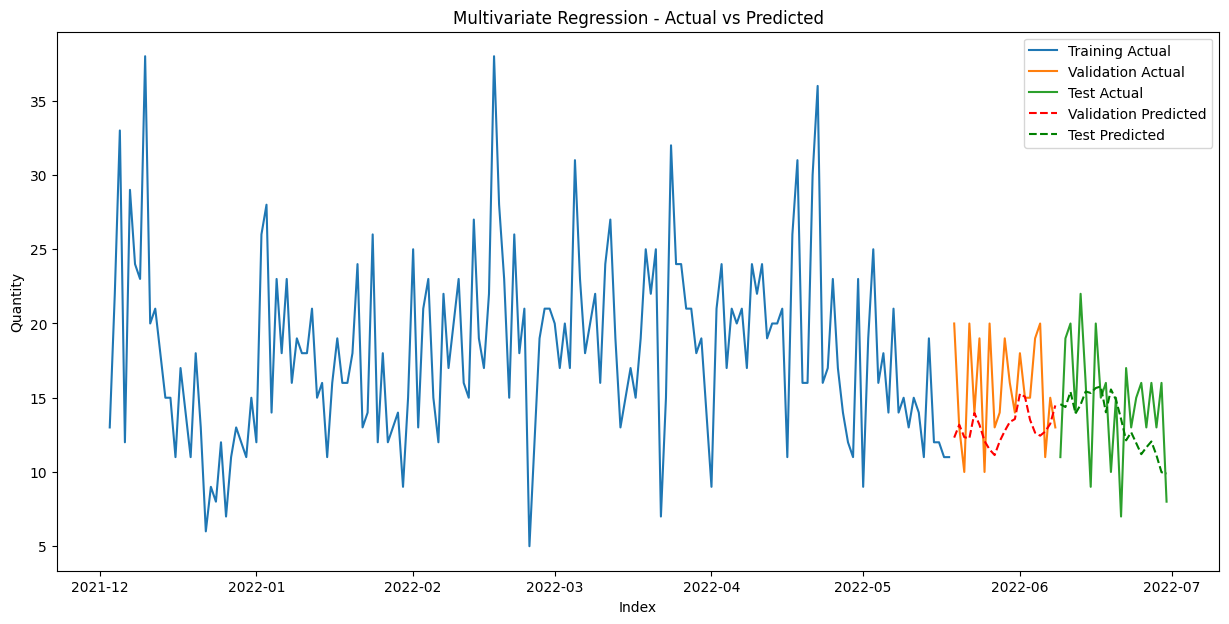


Validation Set Metrics for Multivariate Regression:
MSE: 		19.206 
MAE: 		3.363 
MAPE: 		19.626% 
R2: 		-0.746 
Adjusted R2: 	-1.911

Test Set Metrics for Multivariate Regression:
MSE: 		16.623 
MAE: 		3.396 
MAPE: 		25.904% 
R2: 		-0.131 
Adjusted R2: 	-0.827


In [ ]:
features = ['Impressions', 'Clicks', 'Quarter', 'Is_Weekend', 'Impressions_Lag_1',
            'Clicks_Lag_1', 'Clicks_per_Impression', 'Clicks_stationary']
# Dependent and independent variables
y_train = train_df['Quantity']
X_train = train_df[features]
y_val = val_df['Quantity']
X_val = val_df[features]
y_test = test_df['Quantity']
X_test = test_df[features]
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Call the function to plot predictions and calculate metrics
plot_predictions_and_metrics_multivariate(train_df, val_df, test_df, features, model, 'Multivariate Regression')


## Validation Set Metrics

| Error Metrics / Models     | AR     | MA     | ARMA / ARIMA | SARIMA | ARIMAX | SARIMAX | Multivariate Regression |
|----------------------------|--------|--------|--------------|--------|--------|---------|--------------------------|
| MSE                        | 18.023 | 17.871 | **14.750**       | 20.138 | 24.511 | 24.128  | 19.206                   |
| MAE                        | 3.573  | **3.556**  | 3.374        | 3.637  | 3.763  | 3.727   | 3.363                    |
| MAPE                       | 27.343 | 27.253 | 24.811       | 21.180 | 21.541 | 21.297  | **19.626**                   |
| R2                         | -0.639 | -0.625 | -0.341       | -0.831 | -1.229 | -1.194  | -0.746                   |
| Adjusted R2                | -0.725 | -0.710 | -0.412       | -0.927 | -2.714 | -2.656  | -1.911                   |

## Test Set Metrics

| Error Metrics / Models     | AR     | MA     | ARMA / ARIMA | SARIMA | ARIMAX | SARIMAX | Multivariate Regression |
|----------------------------|--------|--------|--------------|--------|--------|---------|--------------------------|
| MSE                        | 28.025 | 27.512 | 26.682       | 22.110 | 20.248 | 20.243  | **16.623**                   |
| MAE                        | 4.381  | 4.336  | 4.263        | 4.078  | 3.768  | 3.777   | **3.396**                    |
| MAPE                       | 39.622 | 39.220 | 38.561       | 27.915 | 28.203 | 28.290  | **25.904**                   |
| R2                         | -0.907 | -0.872 | -0.816       | -0.504 | -0.378 | -0.377  | -0.131                   |
| Adjusted R2                | -1.002 | -0.966 | -0.906       | -0.580 | -1.226 | -1.225  | -0.827                   |


#Conclusion

*   **Multivariate Regression** stands out as the best-performing
model in this evaluation, with the lowest MAPE values on both the validation (19.626%) and test (25.904%) datasets.This suggests that incorporating multiple variables in a regression framework is beneficial for the prediction. This indicates that it provides the most accurate predictions among the models tested.

*   **SARIMA and SARIMAX** models also perform relatively well, especially in capturing seasonal patterns in the data, as reflected by their lower MAPE values compared to AR, MA, and ARIMA models.


*   The AR and MA models have the highest error rates, suggesting that simpler models may not capture the underlying patterns effectively for this dataset.





Overall, the results suggest that more complex models, such as Multivariate Regression and SARIMA/SARIMAX, provide better accuracy and are more suitable for forecasting.